In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from scipy.signal import correlate
from scipy.signal import convolve
from scipy.ndimage import rotate
import imageio

In [ ]:
prob = lambda x, mu, sigma = 0.7: np.exp(-(((x - mu)**2) / (2.0 * sigma ** 2))) / (sigma * np.sqrt(2 * np.pi))

def gauss(self, mu = 0, sigma = 85):
    x, y = np.meshgrid(np.linspace(-85, 85, num = 169), np.linspace(-85, 85, num = 169))
    return prob(np.sqrt((x ** 2) + (y ** 2)))

def save_image(self, images, output = 'visuals/'):
    for i in range(len(images)):
        plt.imshow(np.abs(images[i]), cmap='gray')
        plt.savefig(output + str(i) + '.png')
        plt.close()

def create_gif(self, images, output = 'animation/'):
    save_image(images, output = output)
    with imageio.get_writer(output + 'animation.gif', mode='I') as writer:
        for i in range(len(images)):
            image = imageio.imread(output + str(i) + '.png')
            writer.append_data(image)

In [15]:
class cryoEM:
    
    def __init__(self, file_dir, noise_level = 0):
        with open(file_dir, 'rb') as file:
            with np.load(file, allow_pickle = True) as data:
                self.images = data["samples"][:,:,:,noise_level]
        self.images = [i / np.amax(i) for i in self.images]
        self.prior = self.images[0]
    
    def display(self, image, output = 'sample'):
        plt.imshow(np.abs(image), cmap='gray')
        plt.show()
    
    def update(self, image_range):
        for i in range(image_range[0], image_range[1]):
            r = [correlate(self.prior, rotate(self.images[i], a, reshape = False, cval = 0), mode = 'same') for a in range(360)]
            index = np.unravel_index(np.argmax(r), (360,85,85))
            aligned = shift(rotate(self.images[i], index[0], reshape = False, cval = 0), (index[1]-42,index[2]-42), mode = 'constant', cval = 0)    
        self.prior = np.add(self.prior, aligned)
        return self.prior

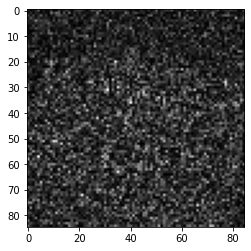

image  1  of  50


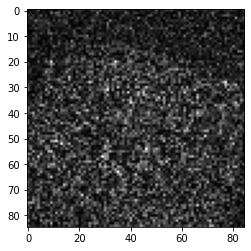

image  2  of  50


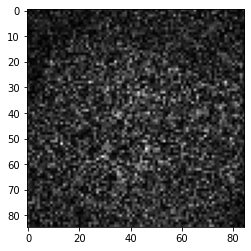

image  3  of  50


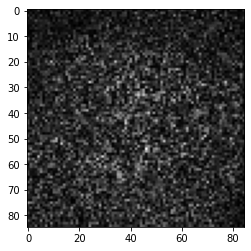

image  4  of  50


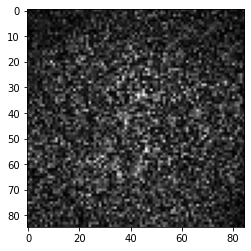

image  5  of  50


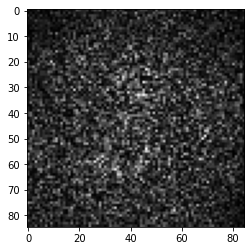

image  6  of  50


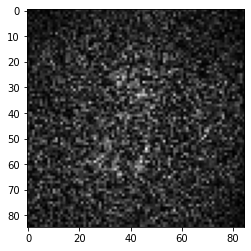

image  7  of  50


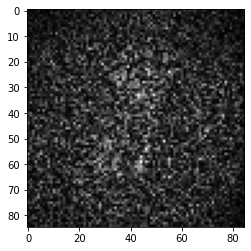

image  8  of  50


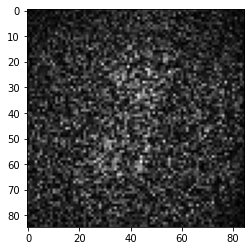

image  9  of  50


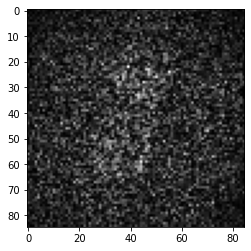

image  10  of  50


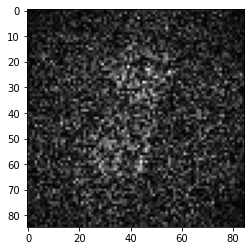

image  11  of  50


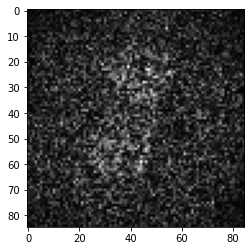

image  12  of  50


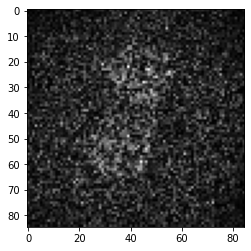

image  13  of  50


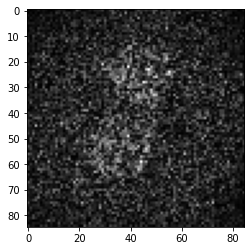

image  14  of  50


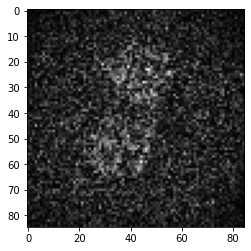

image  15  of  50


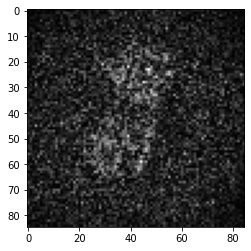

image  16  of  50


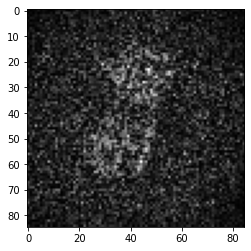

image  17  of  50


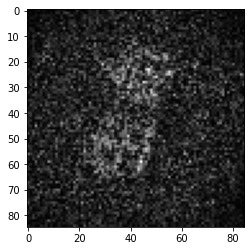

image  18  of  50


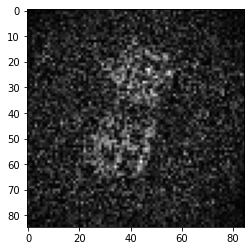

image  19  of  50


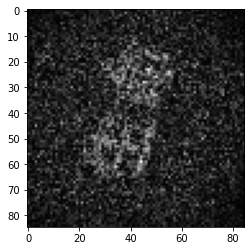

image  20  of  50


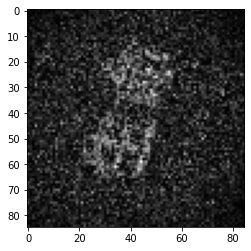

image  21  of  50


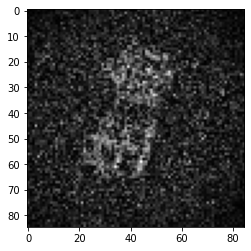

image  22  of  50


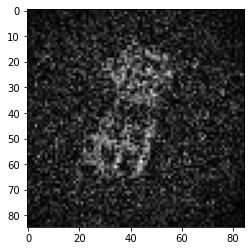

image  23  of  50


KeyboardInterrupt: 

In [19]:
sample = cryoEM(file_dir = "2dImages.npz")

n = 4     #images per cycle
m = 50   #cycles
for i in range(m):
    sample.display(sample.update((i*n,(i+1)*n)))
    print("image ", i + 1, " of ", m)